url https://raw.githubusercontent.com/dudung/datasets/main/data/synthetic/x123_y.csv

In [140]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
scipy: 1.12.0
numpy: 1.26.4
matplotlib: 3.8.2
pandas: 2.2.0
sklearn: 1.4.0


In [141]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [171]:
# Load dataset
url = "https://raw.githubusercontent.com/dudung/datasets/main/data/synthetic/x123_y.csv"
names = ['X1', 'X2', 'X3', 'Y']
dataset = read_csv(url, names=names, header=0)

In [143]:
# shape
print(dataset.shape)

(1000, 4)


In [144]:
# head
print(dataset.head(5))
print()
print(dataset.tail(5))

       X1      X2      X3  Y
0  31.476  54.139  78.319  A
1  14.403  68.740  89.788  A
2  10.890  74.881  73.673  A
3  41.830  53.688  78.826  A
4  27.202  80.607  74.573  A

         X1      X2      X3  Y
995  46.755  69.604  24.783  B
996  34.276  32.053  17.147  B
997  61.518  68.330  19.105  B
998  71.577  40.247  18.811  B
999  45.287  44.205  12.039  B


In [145]:
# descriptions
print(dataset.describe())

                X1           X2           X3
count  1000.000000  1000.000000  1000.000000
mean     42.259981    55.062684    49.988817
std      18.278564    17.599157    30.962492
min      10.209000    20.074000    10.161000
25%      29.202250    42.381750    19.104500
50%      40.822000    55.044500    50.007500
75%      55.832750    67.118000    80.799250
max      79.937000    89.977000    89.991000


In [146]:
# class distribution
print(dataset.groupby('Y').size())

Y
A    500
B    500
dtype: int64


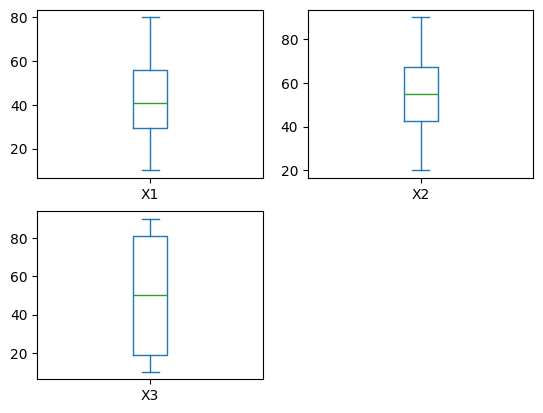

In [148]:
# box and whisker plots
dataset.plot(
    kind='box',
    subplots=True,
    layout=(2,2),
    sharex=False,
    sharey=False)
plt.show()

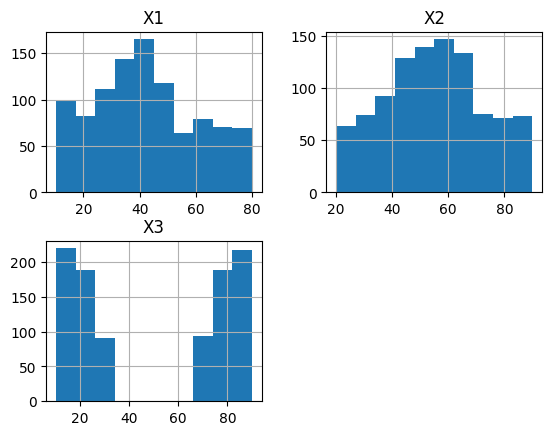

In [149]:
# histograms
dataset.hist()
plt.show()

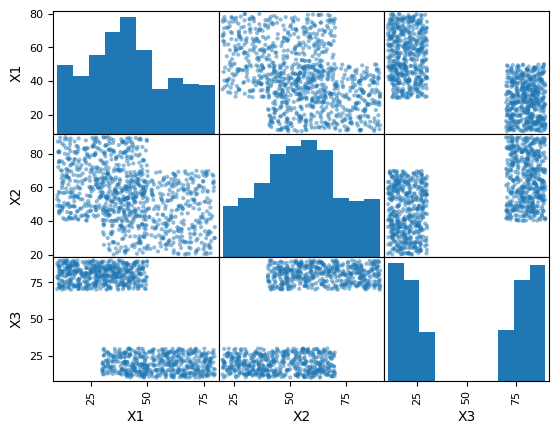

In [150]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [154]:
array = dataset.values
print(array[:5])
print()

X = array[:,0:3]
print(X[:5])
print()

y = array[:,3]
print(y[:5])
print(y[-5:])

[[31.476 54.139 78.319 'A']
 [14.403 68.74 89.788 'A']
 [10.89 74.881 73.673 'A']
 [41.83 53.688 78.826 'A']
 [27.202 80.607 74.573 'A']]

[[31.476 54.139 78.319]
 [14.403 68.74 89.788]
 [10.89 74.881 73.673]
 [41.83 53.688 78.826]
 [27.202 80.607 74.573]]

['A' 'A' 'A' 'A' 'A']
['B' 'B' 'B' 'B' 'B']


In [155]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.20,
    random_state=1
)

In [156]:
print(len(Y_train))
print(len(Y_validation))
print(len(Y_validation) / (len(Y_train) + len(Y_validation)))

800
200
0.2


In [157]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',
                                        multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1,
                         shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train,
                              cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(),
                        cv_results.std()))

LR: 1.000000 (0.000000)
LDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.893750 (0.036336)


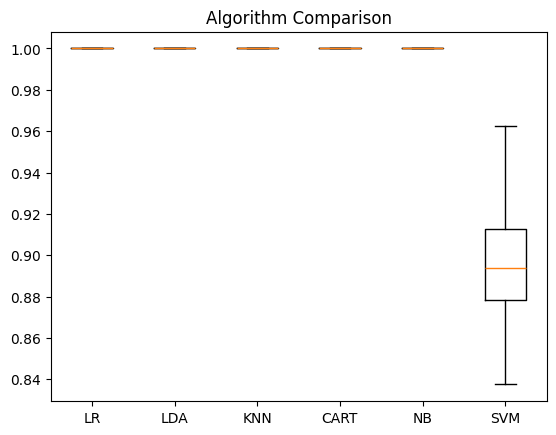

In [158]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [159]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [160]:
# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 0.925

confusion matrix =
 [[ 81  15]
 [  0 104]]

report =
               precision    recall  f1-score   support

           A       1.00      0.84      0.92        96
           B       0.87      1.00      0.93       104

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [161]:
# Make predictions using LR
model = LogisticRegression(
    solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 1.0

confusion matrix =
 [[ 96   0]
 [  0 104]]

report =
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        96
           B       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [162]:
# Make predictions using LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 1.0

confusion matrix =
 [[ 96   0]
 [  0 104]]

report =
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        96
           B       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [163]:
# Make predictions using KNN
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 1.0

confusion matrix =
 [[ 96   0]
 [  0 104]]

report =
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        96
           B       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [164]:
# Make predictions using CART
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 1.0

confusion matrix =
 [[ 96   0]
 [  0 104]]

report =
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        96
           B       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [165]:
# Make predictions using NB
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 1.0

confusion matrix =
 [[ 96   0]
 [  0 104]]

report =
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        96
           B       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [166]:
# Make predictions using SVM
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 0.925

confusion matrix =
 [[ 81  15]
 [  0 104]]

report =
               precision    recall  f1-score   support

           A       1.00      0.84      0.92        96
           B       0.87      1.00      0.93       104

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [167]:
array = dataset.values
print(array[:5])
print()

X = array[:,0:2]
print(X[:5])
print()

y = array[:,3]
print(y[:5])
print(y[-5:])

[[31.476 54.139 78.319 'A']
 [14.403 68.74 89.788 'A']
 [10.89 74.881 73.673 'A']
 [41.83 53.688 78.826 'A']
 [27.202 80.607 74.573 'A']]

[[31.476 54.139]
 [14.403 68.74]
 [10.89 74.881]
 [41.83 53.688]
 [27.202 80.607]]

['A' 'A' 'A' 'A' 'A']
['B' 'B' 'B' 'B' 'B']


In [168]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:2]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.20,
    random_state=1
)

In [169]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',
                                        multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1,
                         shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train,
                              cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(),
                        cv_results.std()))

LR: 0.881250 (0.030746)
LDA: 0.885000 (0.026101)
KNN: 0.891250 (0.027979)
CART: 0.865000 (0.027839)
NB: 0.888750 (0.026487)
SVM: 0.872500 (0.018371)


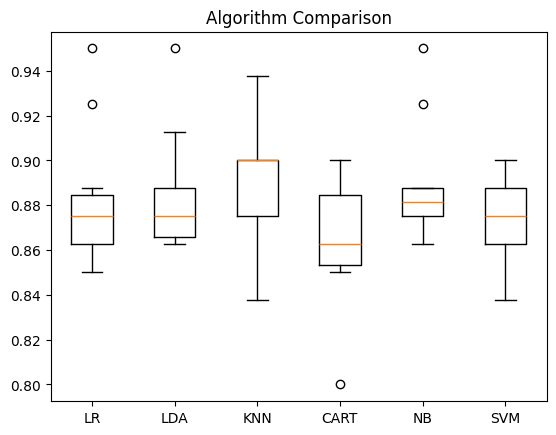

In [170]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()